**Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\5.outlier.csv",header=None)

In [3]:
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


<AxesSubplot:xlabel='0', ylabel='1'>

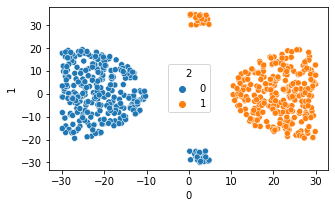

In [4]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.9)

In [6]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(540, 2) (540,)
(60, 2) (60,)


**Standardizing the train data**

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [8]:
std_train=std.fit_transform(x_train)

In [10]:
std_train

array([[ 0.01938572,  2.67947263],
       [ 0.74544902,  0.69156953],
       [-0.92742545,  0.94605345],
       ...,
       [ 1.28002771, -0.05856036],
       [ 1.04544299,  1.20124243],
       [ 0.50185975,  0.23668757]])

**Creating Dense layers**

In [11]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model=Sequential()
model.add(Dense(15, activation = 'relu', input_dim = 2,kernel_initializer='he_uniform'))
model.add(Dense(10, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(5, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                45        
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [14]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [15]:
save=model.fit(x_train,y_train,batch_size=10,epochs=150,verbose=1,validation_split=0.2)

Epoch 1/150
44/44 [==============================] - 3s 14ms/step - loss: 1.1086 - accuracy: 0.5324 - val_loss: 0.3714 - val_accuracy: 0.8981
Epoch 2/150
44/44 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.9236 - val_loss: 0.3022 - val_accuracy: 0.9630
Epoch 3/150
44/44 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.9977 - val_loss: 0.2926 - val_accuracy: 1.0000
Epoch 4/150
44/44 [==============================] - 0s 5ms/step - loss: 0.3247 - accuracy: 1.0000 - val_loss: 0.2849 - val_accuracy: 1.0000
Epoch 5/150
44/44 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 1.0000 - val_loss: 0.2775 - val_accuracy: 1.0000
Epoch 6/150
44/44 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 1.0000 - val_loss: 0.2700 - val_accuracy: 1.0000
Epoch 7/150
44/44 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 1.0000 - val_loss: 0.2626 - val_accuracy: 1.0000
Epoch 8/150


In [16]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

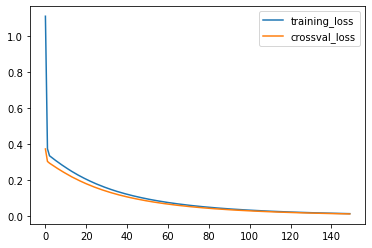

In [19]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [20]:
pred_train = model.predict(x_train)

17/17 [==============================] - 0s 976us/step


In [21]:
pred_train

array([[9.76688445e-01],
       [9.76688445e-01],
       [4.45025599e-08],
       [9.76688445e-01],
       [3.78238029e-21],
       [9.76688445e-01],
       [2.58796359e-21],
       [9.76688445e-01],
       [9.76688445e-01],
       [9.76688445e-01],
       [9.76688445e-01],
       [9.76688445e-01],
       [9.76688445e-01],
       [1.31531351e-06],
       [9.76688445e-01],
       [9.76688445e-01],
       [1.19627150e-17],
       [9.76688445e-01],
       [2.38048250e-20],
       [9.76688445e-01],
       [9.76688445e-01],
       [1.95081743e-20],
       [1.50857171e-15],
       [9.76688445e-01],
       [2.99214581e-12],
       [7.96408287e-11],
       [8.98935941e-14],
       [7.13818871e-09],
       [1.06864122e-21],
       [1.37562722e-07],
       [3.23075629e-11],
       [9.76688445e-01],
       [9.76688445e-01],
       [5.52889609e-14],
       [9.76688445e-01],
       [9.76688445e-01],
       [1.25964561e-07],
       [5.03595299e-17],
       [5.72646996e-09],
       [1.09177457e-12],


In [22]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [24]:
train_pred.shape

(540, 1)

In [25]:
y_pred=train_pred.flatten()

In [26]:
y_pred.shape

(540,)

<AxesSubplot:xlabel='0', ylabel='1'>

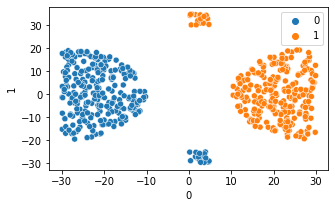

In [27]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_pred)

<AxesSubplot:xlabel='0', ylabel='1'>

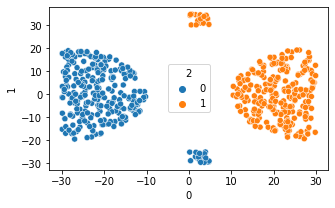

In [28]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [29]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 2s 1ms/step


<AxesSubplot:>

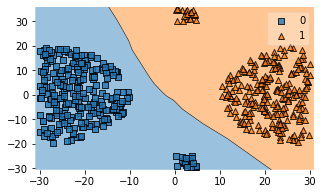

In [30]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

2430/2430 [==============================] - 2s 1ms/step


<AxesSubplot:>

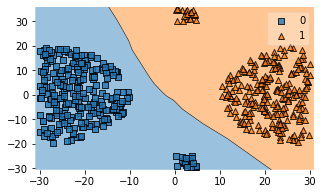

In [31]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_pred.astype(int),clf=model)

In [32]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

1.0